In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
y = boston.target

print (X[0])
print (X.shape)

[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
   5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
   1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
   4.98000000e+00]
(506, 13)


In [2]:
y[:5]

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

In [3]:
X[:5]

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00,
          0.00000000e+00,   5.38000000e-01,   6.57500000e+00,
          6.52000000e+01,   4.09000000e+00,   1.00000000e+00,
          2.96000000e+02,   1.53000000e+01,   3.96900000e+02,
          4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00,
          0.00000000e+00,   4.69000000e-01,   6.42100000e+00,
          7.89000000e+01,   4.96710000e+00,   2.00000000e+00,
          2.42000000e+02,   1.78000000e+01,   3.96900000e+02,
          9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00,
          0.00000000e+00,   4.69000000e-01,   7.18500000e+00,
          6.11000000e+01,   4.96710000e+00,   2.00000000e+00,
          2.42000000e+02,   1.78000000e+01,   3.92830000e+02,
          4.03000000e+00],
       [  3.23700000e-02,   0.00000000e+00,   2.18000000e+00,
          0.00000000e+00,   4.58000000e-01,   6.99800000e+00,
          4.58000000e+01,   6.06220000e+00,   3.000

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Least squares regression
theta,residuals,rank,s = np.linalg.lstsq(X_train, y_train)

In [15]:
X_train

array([[  1.15172000e+00,   0.00000000e+00,   8.14000000e+00, ...,
          3.58770000e+02,   1.83500000e+01,   1.00000000e+00],
       [  1.50100000e-02,   9.00000000e+01,   1.21000000e+00, ...,
          3.95520000e+02,   3.16000000e+00,   1.00000000e+00],
       [  7.35341000e+01,   0.00000000e+00,   1.81000000e+01, ...,
          1.64500000e+01,   2.06200000e+01,   1.00000000e+00],
       ..., 
       [  1.78990000e-01,   0.00000000e+00,   9.69000000e+00, ...,
          3.93290000e+02,   1.76000000e+01,   1.00000000e+00],
       [  2.29690000e-01,   0.00000000e+00,   1.05900000e+01, ...,
          3.94870000e+02,   1.09700000e+01,   1.00000000e+00],
       [  1.06590000e-01,   8.00000000e+01,   1.91000000e+00, ...,
          3.76040000e+02,   5.57000000e+00,   1.00000000e+00]])

In [5]:
# Make predictions on the test data
predictions = np.dot(X_test, theta)
# Let's see the output on training data as well, to see the training error
y_true_pred = np.dot(X_train, theta)

In [6]:
# MSE calculation
from sklearn.metrics import mean_squared_error

print (mean_squared_error(y_test, predictions))
print (mean_squared_error(y_train, y_true_pred))

22.7884662633
24.9650735366


In [7]:
# MAE calculation
from sklearn.metrics import mean_absolute_error

print (mean_absolute_error(y_test, predictions))
print (mean_absolute_error(y_train, y_true_pred))

3.2556180211
3.3694147587


In [8]:
# R2 Score calculation
from sklearn.metrics import r2_score

print (r2_score(y_train, y_true_pred))
print (r2_score(y_test, predictions))

0.709376249319
0.708936770651


In [9]:
X = np.c_[X, np.ones(len(X))]

# Split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Least squares regression
theta,residuals,rank,s = np.linalg.lstsq(X_train, y_train)

# Make predictions on the test data
predictions = np.dot(X_test, theta)
# Let's see the output on training data as well, to see the training error
y_true_pred = np.dot(X_train, theta)

# MSE calculation
print (mean_squared_error(y_test, predictions))
print (mean_squared_error(y_train, y_true_pred))

# MAE calculation
print (mean_absolute_error(y_test, predictions))
print (mean_absolute_error(y_train, y_true_pred))

# R2 Score calculation
print (r2_score(y_train, y_true_pred))
print (r2_score(y_test, predictions))

20.9028436804
22.475403479
3.2145117813
3.349249258
0.738359029964
0.733020681871


In [10]:
import scipy

### Gradient descent ###

# Objective
def f(theta, X, y, lam):
    theta = np.matrix(theta).T
    X = np.matrix(X)
    y = np.matrix(y).T
    diff = X*theta - y
    diffSq = diff.T*diff
    diffSqReg = diffSq / len(X) + lam*(theta.T*theta)
    #print ("offset =", diffSqReg.flatten().tolist())
    return diffSqReg.flatten().tolist()[0]

# Derivative
def fprime(theta, X, y, lam):
    theta = np.matrix(theta).T
    X = np.matrix(X)
    y = np.matrix(y).T
    diff = X*theta - y
    res = 2*X.T*diff / len(X) + 2*lam*theta
    #print ("gradient =", np.array(res.flatten().tolist()[0]))
    return np.array(res.flatten().tolist()[0])

theta, _, _ = scipy.optimize.fmin_l_bfgs_b(f, [0]*14, fprime, args = (X_train, y_train, 0.1))

# Make predictions on the test data
predictions = np.dot(X_test, theta)
# Let's see the output on training data as well, to see the training error
y_true_pred = np.dot(X_train, theta)

# MSE calculation
print (mean_squared_error(y_test, predictions))
print (mean_squared_error(y_train, y_true_pred))

# MAE calculation
print (mean_absolute_error(y_test, predictions))
print (mean_absolute_error(y_train, y_true_pred))

# R2 Score calculation
print (r2_score(y_train, y_true_pred))
print (r2_score(y_test, predictions))

24.2130348059
25.375602712
3.33256013642
3.45257249469
0.704597191547
0.690741622472


In [11]:
import numpy
import random

def feature():
    return [random.random() for x in range(13)]

X_train2 = [feature() for d in X_train]
X_test2 = [feature() for d in X_test]

theta,residuals,rank,s = numpy.linalg.lstsq(X_train2, y_train)

# Make predictions on the test data
predictions = np.dot(X_test2, theta)
# Let's see the output on training data as well, to see the training error
y_true_pred = np.dot(X_train2, theta)

# MSE calculation
print (mean_squared_error(y_test, predictions))
print (mean_squared_error(y_train, y_true_pred))

101.736374621
97.5556041803


In [12]:
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

rng = np.random.RandomState(42)
X = np.c_[X, rng.randn(X.shape[0], 14)]  # add some bad features

# normalize data as done by Lars to allow for comparison
X /= np.sqrt(np.sum(X ** 2, axis=0))

LassoLarsIC: least angle regression with BIC/AIC criterion

/Users/xiasong/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log10


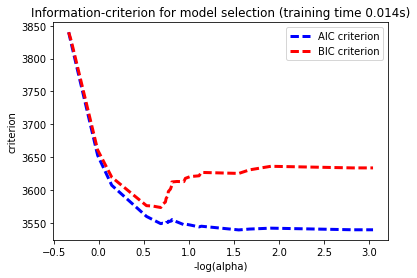

In [13]:
model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_

def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)
plt.show()